In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# data cleaning

In [3]:
img = cv2.imread('./test_images/Anushka_sharma.jpg')
img.shape                                    # 3 dimension(x,y,rgb)

(416, 416, 3)

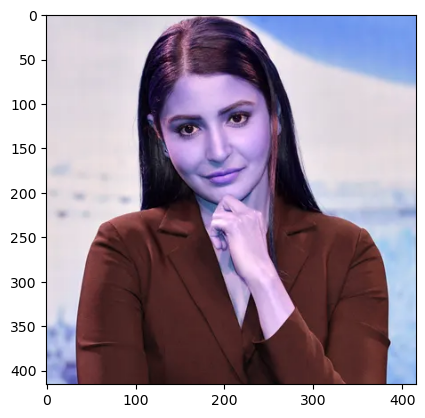

In [4]:
plt.imshow(img)
plt.show()

In [5]:
# change it to a gray image & remove third dimension
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(416, 416)

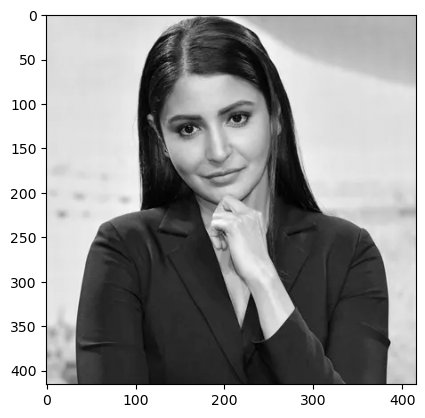

In [6]:
#to show gray image
plt.imshow(gray, cmap='gray')
plt.show()

In [7]:
#CC() - load haarcascade files
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
# detect multiple faces in gray image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[108,  60, 159, 159]], dtype=int32)

In [8]:
#face store in list of tuple
(x,y,w,h) = faces[0] 
x,y,w,h

(108, 60, 159, 159)

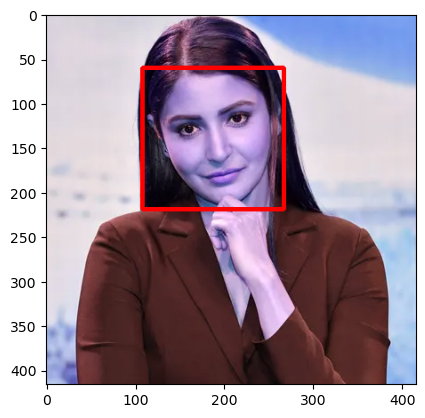

In [9]:
#draw rectangle around the detected face & display using matplotlib 
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)
plt.show()

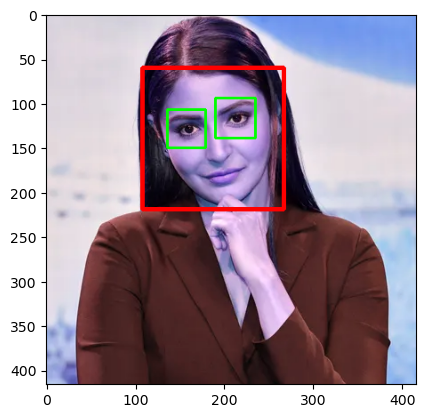

In [10]:
cv2.destroyAllWindows()
# loop through all detected face coordinates
for (x,y,w,h) in faces:  
    #draw rectange around the face
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]          # Extracts the grayscale face region
        roi_color = face_img[y:y+h, x:x+w]     # Extracts the colored face region
    #detect eyes with face region
        eyes = eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.1,minNeighbors=20,minSize=(30, 30))
    # loops through all detected eyes and draws a green 
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#create new matplotlib figure            
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

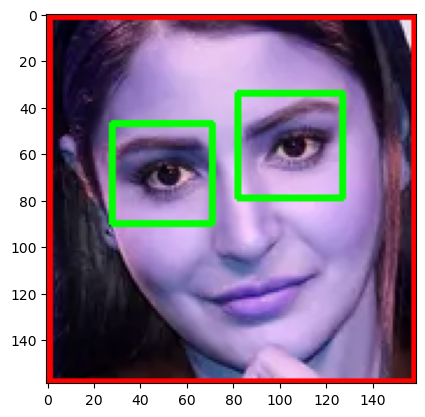

In [11]:
plt.imshow(roi_color,cmap='gray')
plt.show()

In [12]:
# function to give cropped image
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    # if img is not visible of not shown
    if img is None:
        print(f"Warning: Could not load image {image_path}")
        return None
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        #used to give cropped image
        if len(eyes) >= 2:
            return roi_color
    return None

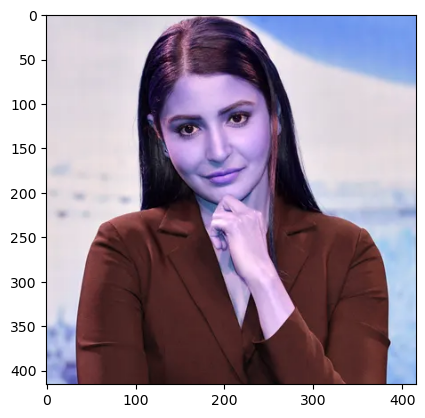

In [13]:
original_image = cv2.imread('./test_images/Anushka_sharma.jpg')
plt.imshow(original_image) 
plt.show()

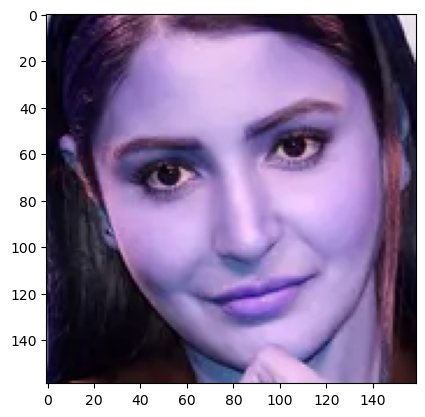

In [14]:
cropped_image = get_cropped_image('./test_images/Anushka_sharma.jpg')
plt.imshow(cropped_image) 
plt.show()

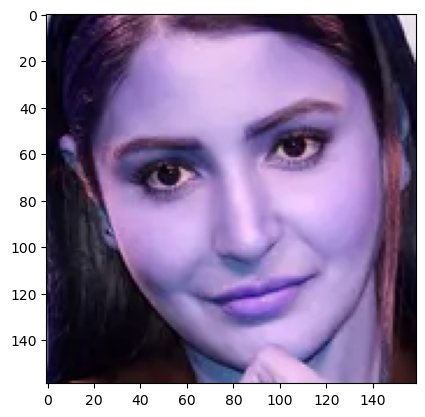

In [15]:
crop_image=get_cropped_image('./test_images/Anushka_sharma.jpg')
if crop_image is not None:
    plt.imshow(crop_image)

In [16]:
# define file path as string 
path_to_data = "./dataset/"
#subfolder
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs=[]
# it goes in all the inner directories
for entry in os.scandir(path_to_data):
    if entry.is_dir() and "cropped" not in entry.path:
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/alia_bhatt',
 './dataset/ranbir_kapoor',
 './dataset/amitabh_bachan',
 './dataset/akshay_kumar',
 './dataset/kareena_kapoor',
 './dataset/anushka_sharma']

In [19]:
#if crop folder is not exist then create using os mkdir
import shutil                           # Import shutil for file operations
if os.path.exists(path_to_cr_data ):    # Check if the "cropped" folder exists
    shutil.rmtree(path_to_cr_data )     # Delete the folder and all its contents
os.mkdir(path_to_cr_data )              # Create an empty "cropped" folder again

In [20]:
# iterate through each of these img directories
cropped_image_dirs=[]
celebrity_file_names_dict = {}      #store celebrity names as keys and their cropped image file paths as values
for img_dir in img_dirs:                        # Loop through each directory in img_dirs
    count = 1
    celebrity_name = img_dir.split('/')[-1]     #extract last part of directory path
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []   # create empty list for current celebrity
    
    for entry in os.scandir(img_dir):
        #
        if entry.name.startswith('.'):  # Skip hidden files like .DS_Store
            continue
        roi_color=get_cropped_image(entry.path)         # Detect face and crop the image
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):            # If the folder does not exist, create it
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped images in folder:",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

alia_bhatt
Generating Cropped images in folder: ./dataset/cropped/alia_bhatt
ranbir_kapoor
Generating Cropped images in folder: ./dataset/cropped/ranbir_kapoor
amitabh_bachan
Generating Cropped images in folder: ./dataset/cropped/amitabh_bachan
akshay_kumar
Generating Cropped images in folder: ./dataset/cropped/akshay_kumar
kareena_kapoor
Generating Cropped images in folder: ./dataset/cropped/kareena_kapoor
anushka_sharma
Generating Cropped images in folder: ./dataset/cropped/anushka_sharma


# feature engineering

In [22]:
import pywt
def w2d(img,mode="haar",level=1):
    imArray=img
    #convert to gray
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    #divide by 255 to normalize pixel value
    imArray /= 255
    #wavedec2
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0
    #waverec2
    imArray_H=pywt.waverec2(coeffs,mode)
    imArray_H *=255
    imArray_H=np.uint8(imArray_H)

    return imArray_H

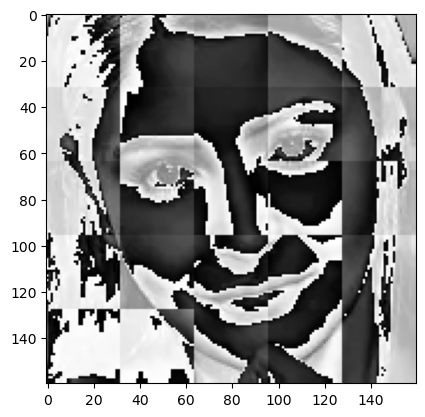

In [23]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')
plt.show()

In [24]:
celebrity_file_names_dict

{'alia_bhatt': ['./dataset/cropped/alia_bhatt/alia_bhatt1.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt2.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt3.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt4.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt5.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt6.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt7.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt8.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt9.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt10.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt11.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt12.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt13.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt14.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt15.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt16.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt17.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt18.jpg',
  './dataset/cropped/alia_bhatt/alia_bhatt19.jpg',
  './dataset/cropped/alia_

In [25]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'alia_bhatt': 0,
 'ranbir_kapoor': 1,
 'amitabh_bachan': 2,
 'akshay_kumar': 3,
 'kareena_kapoor': 4,
 'anushka_sharma': 5}

In [26]:
import os
import pandas as pd

dataset_path = './dataset/'
class_count = []
for class_folder in dataset_path:
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        num_img = len([img for img in os.listdir(class_path) if img.endswith(('jpg', 'png', 'jpeg','webp'))])
        class_count.append({'Name':class_folder,'image_counts':num_img})
df = pd.DataFrame(class_count)
df

,Name,image_counts
0,.,0
1,/,0
2,/,0


In [27]:
#iterate through dictionary & training file is list of imgs
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_images in training_files:
        img=cv2.imread(training_images)
        if img is None:
            continue
        scale_raw_image = cv2.resize(img,(32,32))
        har_image = w2d(img,'db1',5)
        scale_har_image = cv2.resize(har_image,(32,32))
        #vertically stack images
        combined_image=np.vstack((scale_raw_image.reshape(32*32*3,1),scale_har_image.reshape(32*32,1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

In [28]:
import pandas as pd
df=pd.DataFrame(list(celebrity_file_names_dict.items()),columns=['name','image_count'])
df

,name,image_count
0,alia_bhatt,"[./dataset/cropped/alia_bhatt/alia_bhatt1.jpg,..."
1,ranbir_kapoor,[./dataset/cropped/ranbir_kapoor/ranbir_kapoor...
2,amitabh_bachan,[./dataset/cropped/amitabh_bachan/amitabh_bach...
3,akshay_kumar,[./dataset/cropped/akshay_kumar/akshay_kumar1....
4,kareena_kapoor,[./dataset/cropped/kareena_kapoor/kareena_kapo...
5,anushka_sharma,[./dataset/cropped/anushka_sharma/anushka_shar...


In [29]:
len(x[0])

4096

In [30]:
#convert list to float
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(344, 4096)

# training the model

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler         # feature scaling standardization(z-score)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)*100

59.30232558139535

In [34]:
#61.627906976744185

In [35]:
x_train.shape,x_test.shape

((258, 4096), (86, 4096))

In [36]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.75      0.56      0.64        16
           2       0.75      0.55      0.63        11
           3       0.50      0.69      0.58        13
           4       0.56      0.59      0.57        17
           5       0.54      0.54      0.54        13

    accuracy                           0.59        86
   macro avg       0.61      0.59      0.60        86
weighted avg       0.61      0.59      0.60        86



In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
#models & their hyperparameters
model_params= {
    'svm': {
        'model': svm.SVC(probability=True),
         'params': {
             'svc__C': [0.1,10,100,1000],
             'svc__kernel' : ['linear', 'rbf'],
             'svc__gamma': ['scale', 0.001, 0.01, 0.1, 1]
         }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'logisticregression__C': [0.01, 0.1, 1, 5, 10, 50]
        }
     }
}

In [39]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False,n_jobs=2)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.693816,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k..."
1,random_forest,0.395249,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.736652,{'logisticregression__C': 0.01}


In [40]:
train_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print(f"Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")


Train Accuracy: 1.0000, Test Accuracy: 0.6977


In [41]:
# import psutil
# print(f"Memory Usage: {psutil.virtual_memory().percent}%")


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.1, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=0.01, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(x_test,y_test)

0.6395348837209303

In [44]:
best_estimators['random_forest'].score(x_test,y_test)

0.4069767441860465

In [45]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.6976744186046512

In [46]:
best_clf= best_estimators['logistic_regression']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 9,  0,  0,  1,  4,  2],
       [ 0, 13,  0,  2,  0,  1],
       [ 1,  1,  7,  2,  0,  0],
       [ 1,  1,  2,  9,  0,  0],
       [ 3,  0,  0,  2, 11,  1],
       [ 2,  0,  0,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Original')

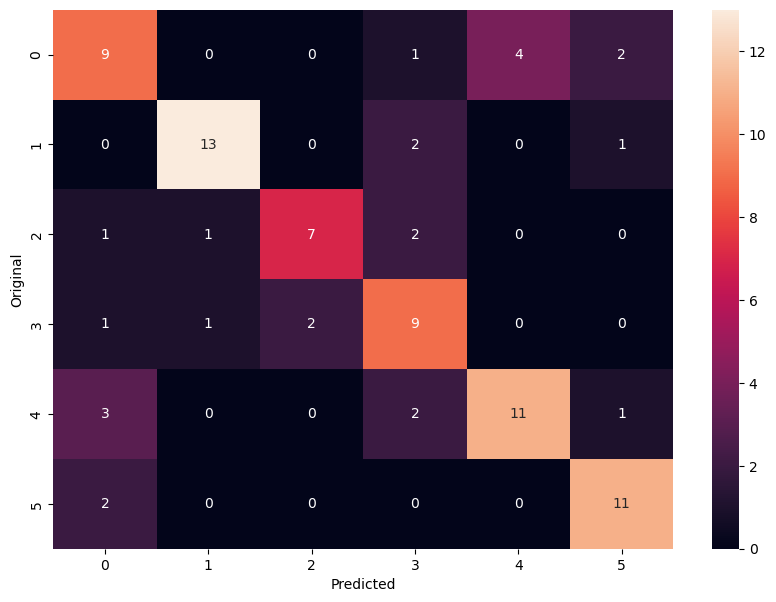

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Original")

In [49]:
class_dict

{'alia_bhatt': 0,
 'ranbir_kapoor': 1,
 'amitabh_bachan': 2,
 'akshay_kumar': 3,
 'kareena_kapoor': 4,
 'anushka_sharma': 5}

# save model

In [51]:
!pip install joblib
import joblib
#save model as pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# save class dictionary used with js

In [53]:
import json
with open('class_dictory.json','w') as f:
    f.write(json.dumps(class_dict))